In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = '../data/500SKUs_data.csv'

In [2]:
df = pd.read_csv(path)

In [3]:
df.head()

,date,skuId,skuDescription,Hierarchy_1,Hierarchy_3,Hierarchy_5,quantity,priceIndex,revenue
0,12/30/2013,9781400032716,THE CURIOUS INCIDENT OF THE DOG IN THE NIGHTTIME,Fict Literary,Fiction,TRADE PAPERBACK,1,14.9500,13.45
1,12/30/2013,9781400205394,JESUS RELIGION WHY HE IS SO MUCH BETTER THAN T...,Christn Living,Religion/Inspiration,TRADE PAPERBACK,1,8.4900,8.49
2,12/31/2013,9780060530891,WHERES THE POOP,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,5,10.9900,52.75
3,12/31/2013,9780060570941,BECKHAM BOTH FEET ON THE GROUND AN AUTOBIOGRAPHY,Soccer Bio,Sports Team,TRADE PAPERBACK,4,14.0525,56.21
4,12/31/2013,9780060924584,RUN WITH THE HUNTED A CHARLES BUKOWSKI READER,Fict Literary,Fiction,TRADE PAPERBACK,7,16.9900,110.43


In [4]:
df.describe()

,skuId,quantity,priceIndex,revenue
count,4.326010e+05,432601.000000,432601.000000,432601.000000
mean,9.781032e+12,5.877772,18.056566,96.479803
std,8.801963e+08,17.242280,8.065938,293.663158
min,9.780061e+12,1.000000,0.000000,0.000000
25%,9.780447e+12,1.000000,13.990000,18.980000
50%,9.780818e+12,3.000000,16.000000,41.600000
75%,9.781477e+12,5.000000,19.990000,87.290000
max,9.789813e+12,1933.000000,75.000000,41325.990000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432601 entries, 0 to 432600
Data columns (total 9 columns):
date              432601 non-null object
skuId             432601 non-null int64
skuDescription    430223 non-null object
Hierarchy_1       432601 non-null object
Hierarchy_3       432601 non-null object
Hierarchy_5       432601 non-null object
quantity          432601 non-null int64
priceIndex        432601 non-null float64
revenue           432601 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 29.7+ MB


In [6]:
df['skuId'] = pd.to_numeric(df['skuId']) 
df['Hierarchy_1'] = df['Hierarchy_1'].astype(str)
df['Hierarchy_3'] = df['Hierarchy_3'].astype(str) 
df['Hierarchy_5'] = df['Hierarchy_5'].astype(str) 

In [7]:
df = df[['date', 'skuId', 'Hierarchy_1', 'Hierarchy_3',
       'Hierarchy_5', 'quantity', 'priceIndex', 'revenue']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432601 entries, 0 to 432600
Data columns (total 8 columns):
date           432601 non-null object
skuId          432601 non-null int64
Hierarchy_1    432601 non-null object
Hierarchy_3    432601 non-null object
Hierarchy_5    432601 non-null object
quantity       432601 non-null int64
priceIndex     432601 non-null float64
revenue        432601 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 26.4+ MB


In [9]:
df.isnull().sum()

date           0
skuId          0
Hierarchy_1    0
Hierarchy_3    0
Hierarchy_5    0
quantity       0
priceIndex     0
revenue        0
dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
df['skuId'].value_counts().count()

502

In [12]:
df['Hierarchy_1'].value_counts().count()

286

In [13]:
df['Hierarchy_3'].value_counts().count()

72

In [14]:
df['Hierarchy_5'].value_counts().count()

2

In [15]:
df['date'].value_counts().count()

1497

In [16]:
df['date'].max()

Timestamp('2018-02-11 00:00:00')

In [17]:
df['date'].min()

Timestamp('2013-12-30 00:00:00')

In [18]:
given_dates = df['date'].unique()
all_dates = pd.date_range(start='2013-12-30', end='2018-02-11')

In [19]:
len(all_dates)

1505

In [20]:
missing_dates = np.setdiff1d(all_dates, given_dates)

In [21]:
len(missing_dates)

8

In [22]:
missing_dates = pd.to_datetime(missing_dates)

In [23]:
missing_dates

DatetimeIndex(['2014-11-27', '2014-12-25', '2015-11-26', '2015-12-25',
               '2016-11-24', '2016-12-25', '2017-11-23', '2017-12-25'],
              dtype='datetime64[ns]', freq=None)

In [24]:
df['selling'] = df['revenue'] / df['quantity']

In [25]:
df['discount'] = df['priceIndex'] - df['selling']

In [26]:
df.head()

,date,skuId,Hierarchy_1,Hierarchy_3,Hierarchy_5,quantity,priceIndex,revenue,selling,discount
0,2013-12-30,9781400032716,Fict Literary,Fiction,TRADE PAPERBACK,1,14.9500,13.45,13.450000,1.500000
1,2013-12-30,9781400205394,Christn Living,Religion/Inspiration,TRADE PAPERBACK,1,8.4900,8.49,8.490000,0.000000
2,2013-12-31,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,5,10.9900,52.75,10.550000,0.440000
3,2013-12-31,9780060570941,Soccer Bio,Sports Team,TRADE PAPERBACK,4,14.0525,56.21,14.052500,0.000000
4,2013-12-31,9780060924584,Fict Literary,Fiction,TRADE PAPERBACK,7,16.9900,110.43,15.775714,1.214286


In [27]:
df_2013_discount = df[(df['date'] < '2014-01-01') & (df['discount'] > 0)]
df_2013_no_discount = df[(df['date'] < '2014-01-01') & (df['discount'] == 0)]

In [28]:
df_discount =  df[df['discount'] > 0]
df_no_discount = df[df['discount'] == 0]

In [29]:
df_discount_group = df_discount.groupby(['skuId']).sum()['revenue'].sort_index()

In [30]:
df_no_discount_group = df_no_discount.groupby(['skuId']).sum()['revenue'].sort_index()

In [31]:
df_final = df_discount_group > df_no_discount_group

In [32]:
df_final

skuId
9780060530891     True
9780060570941     True
9780060924584     True
9780061155772     True
9780061351631     True
9780061451843     True
9780061469060    False
9780061687457     True
9780061724947     True
9780061740237     True
9780061763298     True
9780061997211     True
9780062226655     True
9780062267535     True
9780062323774     True
9780062387875     True
9780062388513     True
9780062441706     True
9780062445544     True
9780062457332     True
9780062458827     True
9780062486141     True
9780062661371     True
9780066620992     True
9780071486101     True
9780071767736     True
9780071807371     True
9780134511184     True
9780140154030     True
9780140238280     True
                 ...  
9781848312050    False
9781889057774    False
9781890774981     True
9781904991847     True
9781907708534     True
9781910904329     True
9781930332966     True
9781931636872     True
9781933363059     True
9781933372006     True
9781933397269     True
9781936214600     True
97819

In [33]:
df_final = df_final[df_final == True]
df_final_false = df_final[df_final == False]

In [34]:
df_final_false

Series([], Name: revenue, dtype: bool)

In [35]:
for index, value in df_final.iteritems():
    print(index)

9780060530891
9780060570941
9780060924584
9780061155772
9780061351631
9780061451843
9780061687457
9780061724947
9780061740237
9780061763298
9780061997211
9780062226655
9780062267535
9780062323774
9780062387875
9780062388513
9780062441706
9780062445544
9780062457332
9780062458827
9780062486141
9780062661371
9780066620992
9780071486101
9780071767736
9780071807371
9780134511184
9780140154030
9780140238280
9780142181676
9780143036562
9780143110712
9780143114246
9780143114550
9780143118701
9780143119609
9780143122135
9780143122302
9780143122975
9780143126843
9780143129455
9780147515322
9780156011464
9780156027649
9780156106986
9780156439619
9780198745464
9780198759492
9780226323039
9780306824135
9780307278821
9780307338402
9780307386045
9780307387264
9780307457820
9780307461360
9780307475152
9780307587596
9780307592736
9780307700254
9780307744203
9780307885159
9780307886064
9780307887962
9780307951465
9780310546511
9780310629320
9780312324889
9780312571214
9780312590390
9780312681418
978031

In [36]:
df.head()

,date,skuId,Hierarchy_1,Hierarchy_3,Hierarchy_5,quantity,priceIndex,revenue,selling,discount
0,2013-12-30,9781400032716,Fict Literary,Fiction,TRADE PAPERBACK,1,14.9500,13.45,13.450000,1.500000
1,2013-12-30,9781400205394,Christn Living,Religion/Inspiration,TRADE PAPERBACK,1,8.4900,8.49,8.490000,0.000000
2,2013-12-31,9780060530891,Infant/Tod-Potty Training,Parenting,TRADE HARDCOVER,5,10.9900,52.75,10.550000,0.440000
3,2013-12-31,9780060570941,Soccer Bio,Sports Team,TRADE PAPERBACK,4,14.0525,56.21,14.052500,0.000000
4,2013-12-31,9780060924584,Fict Literary,Fiction,TRADE PAPERBACK,7,16.9900,110.43,15.775714,1.214286


In [37]:
df_old = df[(df['date'] < '2017-10-30')]
df_2017_18 = df[(df['date'] > '2017-10-30') & (df['date'] <= '2018-02-11')]

df_2017_18_discount = df_2017_18[(df_2017_18['discount'] > 0)]
df_2017_18_no_discount = df_2017_18[(df_2017_18['discount'] == 0)]

In [38]:
df_2017_18_discount_group = df_2017_18_discount.groupby(['skuId']).sum()['revenue'].sort_index()
df_2017_18_no_discount_group = df_2017_18_no_discount.groupby(['skuId']).sum()['revenue'].sort_index()

In [39]:
df_2017_18_discount_group

skuId
9780060530891      3387.54
9780060570941      2857.77
9780060924584      1801.01
9780061155772      2063.01
9780061351631      1394.96
9780061451843       238.77
9780061469060       120.93
9780061687457     12580.59
9780061724947      3037.87
9780061740237      2713.60
9780061763298       236.82
9780061997211       199.42
9780062226655       189.79
9780062267535      7583.86
9780062323774       155.94
9780062387875      1273.69
9780062388513        18.89
9780062445544       429.55
9780062457332      1101.67
9780062458827      5532.09
9780062486141     34879.87
9780062661371      5930.38
9780066620992    121731.38
9780071486101     16469.09
9780071767736      2156.73
9780071807371      2590.91
9780134511184      7353.18
9780140154030       167.30
9780140238280      4143.84
9780142181676      1474.97
                   ...    
9781848312050        42.77
9781889057774       271.91
9781890774981      1370.51
9781904991847      5937.79
9781907708534        26.95
9781910904329       18

In [40]:
new_sales = list(set(df_2017_18_discount_group.index) - set(df_old['skuId']))

In [41]:
df_new_sales = df[df.skuId.isin(tuple(new_sales))] 

In [42]:
df_new_discount = []
df_new_no_discount = []

for sale in new_sales:
    df_new_discount.append(df_new_sales[(df_new_sales['skuId'] == sale) & (df_new_sales['discount'] > 0)])
    df_new_no_discount.append(df_new_sales[(df_new_sales['skuId'] == sale) & (df_new_sales['discount'] == 0)])

In [43]:
len(df_new_discount)

3

In [44]:
len(df_new_no_discount)

3

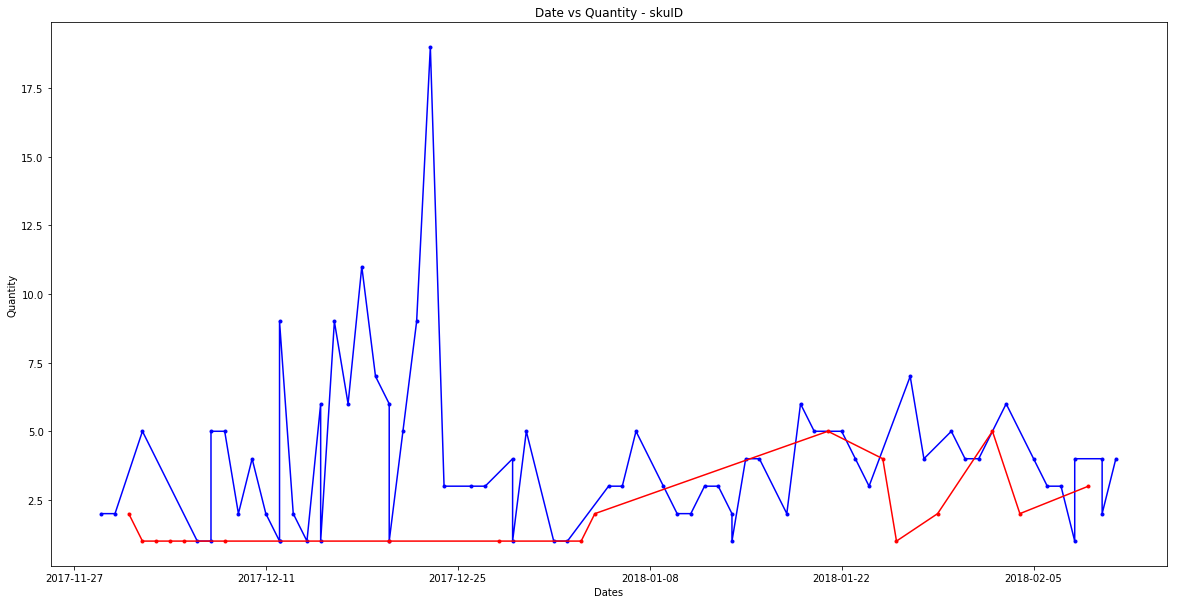

<Figure size 432x288 with 0 Axes>

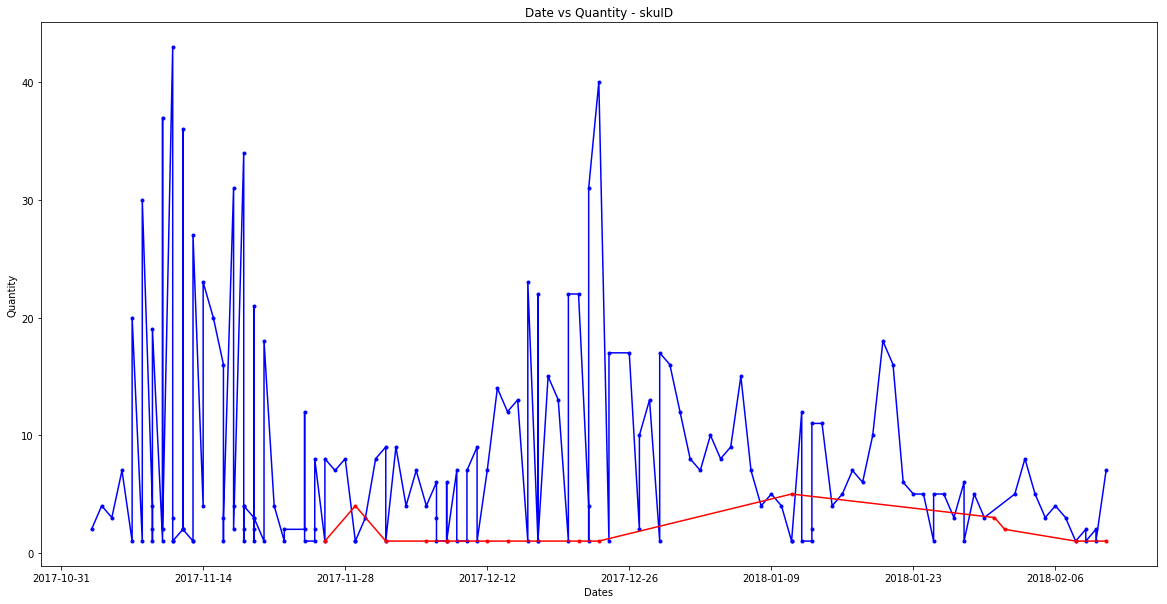

<Figure size 432x288 with 0 Axes>

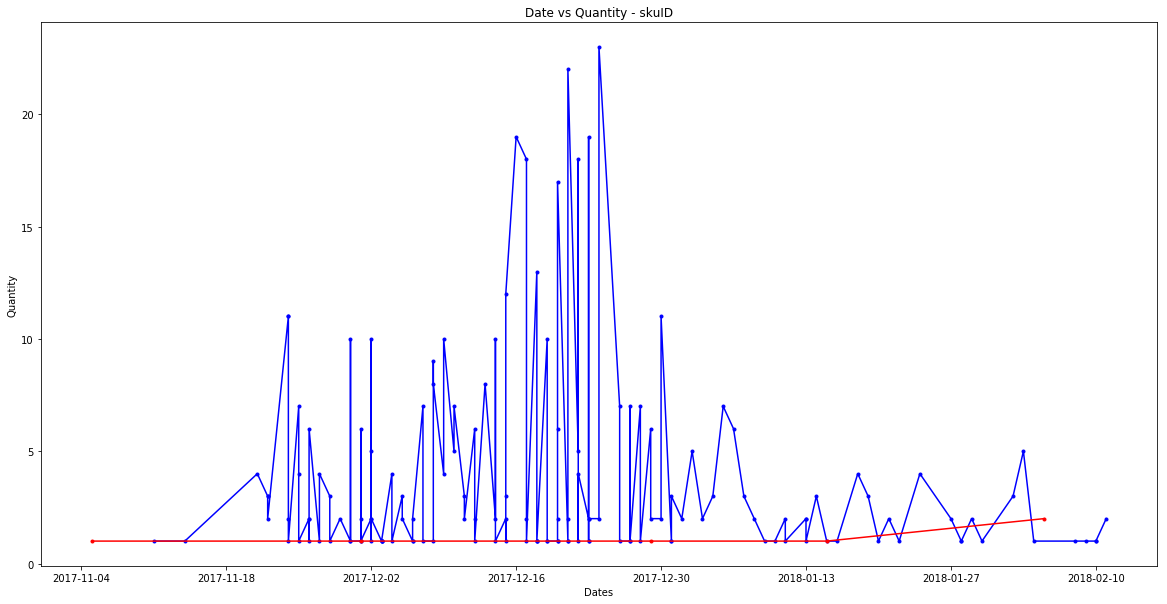

<Figure size 432x288 with 0 Axes>

In [46]:
count = 0

for new_discount, new_no_discount in zip(df_new_discount, df_new_no_discount):
    plt.figure(figsize=(20,10))
    plt.plot(new_discount['date'], new_discount['quantity'], marker='.', color='b')
    plt.plot(new_no_discount['date'], new_no_discount['quantity'], marker='.', color='r')
#     plt.xticks(pd.date_range('2017-10-30', '2018-02-11'))
    plt.title('Date vs Quantity - skuID')
    plt.xlabel('Dates')
    plt.ylabel('Quantity')
    plt.show()
    
    plt.savefig(str(count))
    count += 0